<a href="https://www.kaggle.com/code/amalsalilan/claimsdatainsights-demographic-health-factors?scriptVersionId=116706714" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import plotly.express as px

In [3]:
# Read in the csv file
data = pd.read_csv("/kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv")

# the distribution of insurance claims by age

In [4]:
fig = px.bar(data, x="age", y="claim", text="claim")
fig.show()

# distribution of insurance claims by gender

In [5]:
fig = px.bar(data, x="gender", y="claim", text="claim")
fig.show()

# distribution of insurance claims by bmi

In [6]:
fig = px.bar(data, x="bmi", y="claim", text="claim", color="smoker")
fig.show()


In [7]:
fig = px.bar(data, x="bmi", y="claim", text="claim", color="region", color_discrete_sequence = px.colors.sequential.Plasma)
fig.show()


# distribution of insurance claims by bloodpressure

In [8]:
fig = px.bar(data, x="bloodpressure", y="claim", text="claim", color="diabetic", color_discrete_sequence = px.colors.sequential.Jet)
fig.show()

# distribution of insurance claims by diabetic

In [9]:
fig = px.bar(data, x="diabetic", y="claim", text="claim")
fig.show()

# distribution of insurance claims by number of children

In [10]:
fig = px.bar(data, x="children", y="claim", text="claim")
fig.show()




# distribution of insurance claims by smoker

In [11]:
fig = px.bar(data, x="smoker", y="claim", text="claim")
fig.show()

#  distribution of insurance claims by region

In [12]:
fig = px.bar(data, x="region", y="claim", text="claim")
fig.show()

In [13]:
import seaborn as sns

# the correlation between demographic factors and insurance claim amounts

In [14]:
import numpy as np

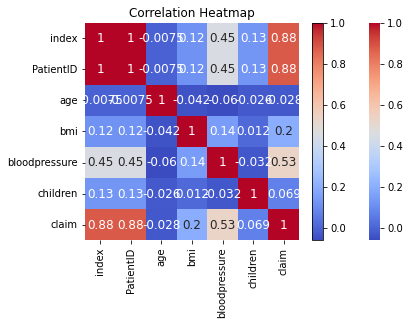

In [15]:

ax = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 12})
ax.set_facecolor('white')
plt.title('Correlation Heatmap')
plt.colorbar(ax.collections[0])
plt.show()



# the distribution of insurance claim amounts by region

In [16]:
fig = px.box(data, x="region", y="claim")
fig.show()

# the distribution of insurance claim amounts by diabetic status

In [17]:
fig = px.box(data, x="diabetic", y="claim")
fig.show()

# distribution of insurance claim amounts by smoking status

In [18]:
fig = px.box(data, x="smoker", y="claim")
fig.show()

# distribution of insurance claim amounts by number of children

In [19]:
fig = px.box(data, x="children", y="claim")
fig.show()

#  violin plot showing the distribution of insurance claim amounts by age and gender

In [20]:
fig = px.violin(data, y="claim", x="age", box=True, points='all',hover_data=data.columns)
fig.show()

In [21]:
fig = px.scatter(data, x="age", y="claim", color="gender", marginal_x="histogram", marginal_y="histogram", hover_data=data.columns)
fig.show()


In [22]:
import plotly.graph_objects as go

# plot showing the trends of insurance claims over time

In [23]:
age_group = data.groupby('age').sum()
fig = go.Figure(data=go.Scatter(x=age_group.index, y=age_group['claim'],mode='lines+markers'))
fig.update_layout(title='Claims over time',xaxis_title='Age',yaxis_title='Claims')
fig.show()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [25]:
data.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [26]:
# Compute the correlation matrix
corr = data.corr()

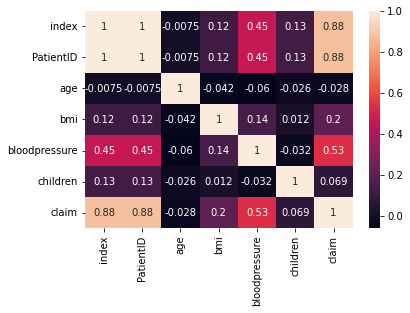

In [27]:
# Generate a heatmap of the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()

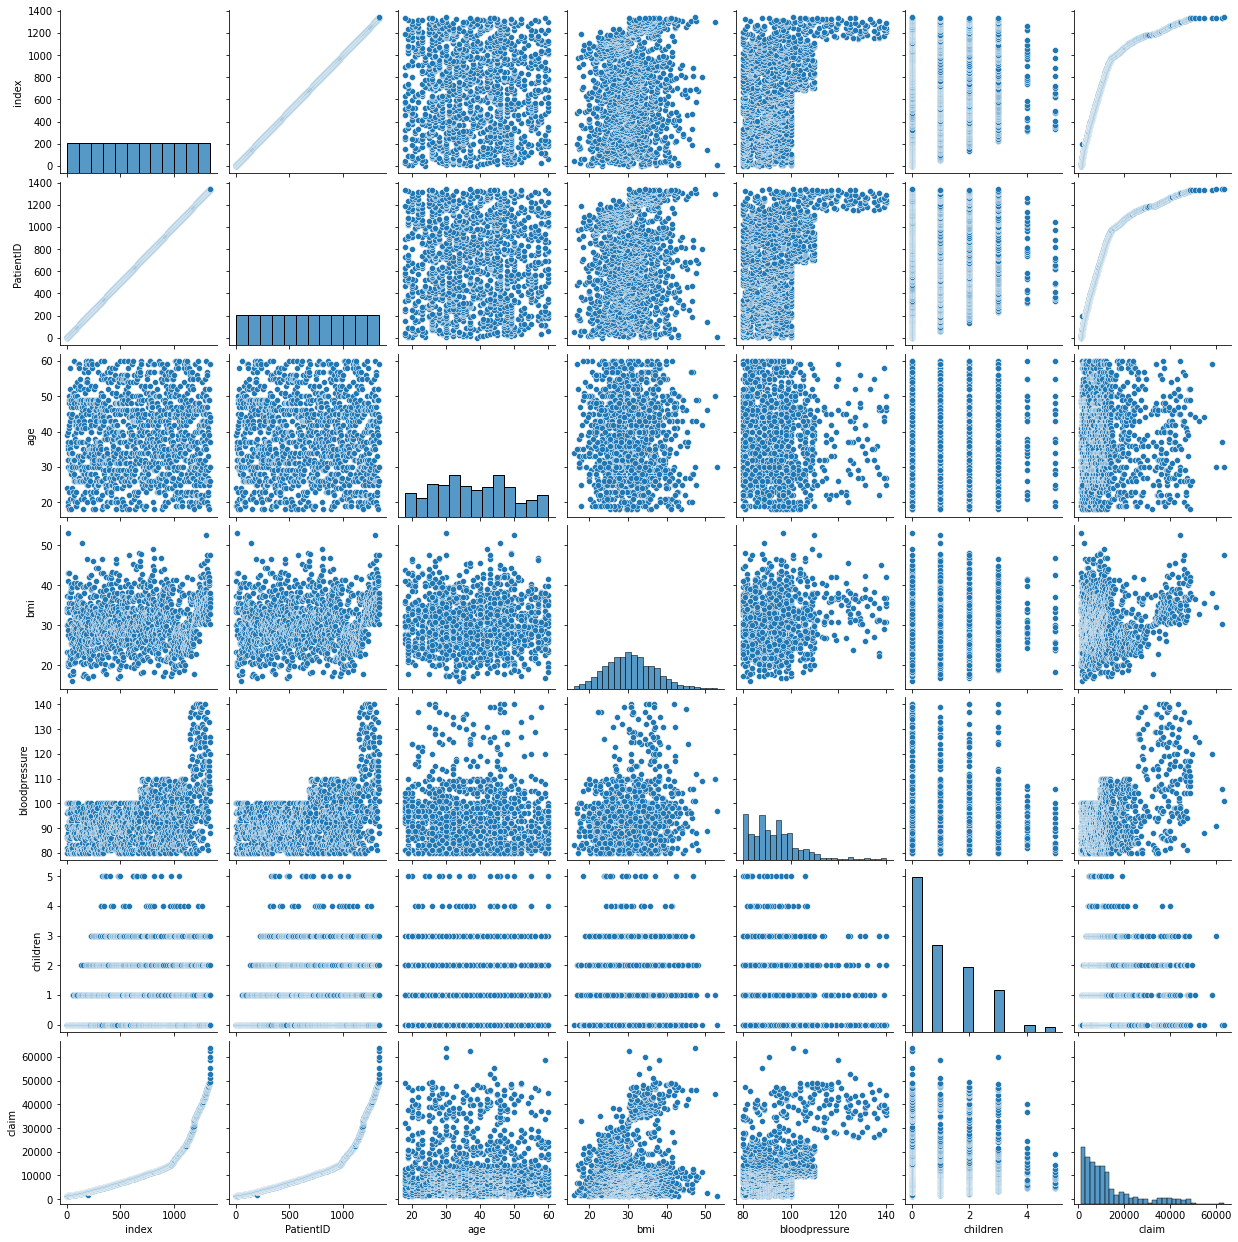

In [28]:
# Use the pairplot function to generate scatter plots for the variables
sns.pairplot(data)
plt.show()

In [29]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [30]:
def advanced_preprocess_numeric_columns(df, method='median'):
    """Takes a Pandas DataFrame and performs advanced preprocessing on all numeric columns that need it.
    
    Fills missing values using SimpleImputer, scales the data using StandardScaler, and removes outliers using the Z-score.
    
    Returns the modified DataFrame.
    """
    # Make a copy of the DataFrame to avoid modifying the original data
    df = df.copy()
    
    # Get a list of all numeric columns
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Loop through each numeric column
    for col in numeric_columns:
        # Check if the column has missing values or outliers
        if df[col].isnull().any() or df[col].between(df[col].quantile(.01), df[col].quantile(.99)).all():
            # Fill missing values using SimpleImputer
            imputer = SimpleImputer(strategy=method)
            df[col] = imputer.fit_transform(df[col].values.reshape(-1, 1))

            # Scale the data using StandardScaler
            scaler = StandardScaler()
            df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

            # Remove outliers using the Z-score
            z_scores = stats.zscore(df[col])
            df = df[np.abs(z_scores) < 3]
            
    print("Advanced preprocessing steps completed for columns that needed it: filled missing values, scaled data, and removed outliers.")
    return df

In [31]:
modified_df = pd.DataFrame(advanced_preprocess_numeric_columns(data, method='median'))

Advanced preprocessing steps completed for columns that needed it: filled missing values, scaled data, and removed outliers.


In [32]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def advanced_preprocess_categorical_columns(df, encoding='onehot', ordinal_columns=None, rare_threshold=10, unknown_categories='Other'):
    """Takes a Pandas DataFrame and performs advanced preprocessing on all categorical columns.
    
    Fills missing values with the mode, removes rare categories, and encodes the data using one-hot encoding or ordinal encoding.
    
    Args:
        df: Pandas DataFrame
        encoding: encoding method to use ('onehot' or 'ordinal')
        ordinal_columns: dictionary of ordinal columns and their corresponding categories (e.g., {'column_name': ['low', 'medium', 'high']})
        rare_threshold: threshold for removing rare categories (default is 10)
        unknown_categories: label for unknown categories (default is 'Other')
        
    Returns:
        modified DataFrame
    """
    # Make a copy of the DataFrame to avoid modifying the original data
    df = df.copy()
    
    # Get a list of all categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Fill missing values with the mode
    for col in categorical_columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        
    # Remove rare categories
    for col in categorical_columns:
        # Get the counts of each category
        counts = df[col].value_counts()
        
        # Remove categories with less than rare_threshold occurrences
        df[col] = df[col].apply(lambda x: x if counts[x] >= rare_threshold else unknown_categories)
        
    if encoding == 'onehot':
        # Encode the data using one-hot encoding
        df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
        
    elif encoding == 'ordinal':
        # Check if ordinal_columns is provided
        if ordinal_columns is None:
            raise ValueError("ordinal_columns must be provided when using ordinal encoding.")
            
        # Encode the data using ordinal encoding
        for col, categories in ordinal_columns.items():
            df[col] = df[col].astype('category', categories=categories, ordered=True)
            df[col] = df[col].cat.codes
            
    else:
        raise ValueError("Invalid encoding method. Must be 'onehot' or 'ordinal'.")
        
    print("Advanced preprocessing steps completed: filled missing values, removed rare categories, and encoded data.")
    return df

# Create a new dataframe to store the preprocessed data
preprocessed_df = pd.DataFrame()

# Preprocess the data and store it in the new dataframe
preprocessed_df = advanced_preprocess_categorical_columns(modified_df)

Advanced preprocessing steps completed: filled missing values, removed rare categories, and encoded data.


In [33]:
preprocessed_df

,index,PatientID,age,bmi,bloodpressure,children,claim,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,0,1,0.083195,23.2,91,-0.907376,1121.87,1,1,0,0,1,0
1,1,2,-1.270835,30.1,87,-0.907376,1131.51,1,0,0,0,1,0
2,2,3,-0.007073,33.3,82,-0.907376,1135.94,1,1,0,0,1,0
3,3,4,-0.007073,33.7,80,-0.907376,1136.40,1,0,0,1,0,0
4,4,5,-0.007073,34.1,100,-0.907376,1137.01,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,0.534539,35.5,88,-0.907376,55135.40,0,1,1,1,0,0
1336,1336,1337,1.888569,38.1,120,-0.077421,58571.07,0,0,1,0,0,0
1337,1337,1338,-0.729223,34.5,91,1.582489,60021.40,1,1,1,1,0,0
1338,1338,1339,-0.097342,30.4,106,-0.907376,62592.87,1,0,1,0,1,0


In [34]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1322 non-null   int64  
 1   PatientID         1322 non-null   int64  
 2   age               1322 non-null   float64
 3   bmi               1322 non-null   float64
 4   bloodpressure     1322 non-null   int64  
 5   children          1322 non-null   float64
 6   claim             1322 non-null   float64
 7   gender_male       1322 non-null   uint8  
 8   diabetic_Yes      1322 non-null   uint8  
 9   smoker_Yes        1322 non-null   uint8  
 10  region_northwest  1322 non-null   uint8  
 11  region_southeast  1322 non-null   uint8  
 12  region_southwest  1322 non-null   uint8  
dtypes: float64(4), int64(3), uint8(6)
memory usage: 90.4 KB


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assume `data` is your dataset
X = preprocessed_df.drop(columns=["claim"]) # independent variables

# Create a dataframe to store the VIFs
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)


             VIF          features
0   6.161384e+07             index
1   6.175338e+07         PatientID
2   1.191056e+00               age
3   1.109165e+00               bmi
4   1.330807e+00     bloodpressure
5   1.042289e+00          children
6   1.198173e+00       gender_male
7   1.008316e+00      diabetic_Yes
8   1.932668e+00        smoker_Yes
9   1.946188e+00  region_northwest
10  2.138971e+00  region_southeast
11  1.868027e+00  region_southwest


This dataset is ready for feeding to a linear regression model as it has been preprocessed and cleaned. You can use the statistical methods such as correlation analysis and regression analysis to understand the relationship between different variables.

# the VIF values for all the independent variables are less than 10 which is considered acceptable and indicates that there is no multicollinearity among the independent variables

# Split the dataset into training and testing sets

In [36]:
from sklearn.model_selection import train_test_split

# Assign the independent variables (X) and dependent variable (y)
X = preprocessed_df.drop('claim', axis=1)
y = preprocessed_df['claim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
X_train

,index,PatientID,age,bmi,bloodpressure,children,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
1189,1189,1190,-0.458417,30.0,81,-0.907376,0,1,1,1,0,0
309,309,310,-0.548685,33.0,94,1.582489,1,1,0,0,1,0
209,209,210,-0.458417,20.8,87,-0.077421,0,1,0,0,0,1
367,367,368,-1.722178,17.9,90,-0.077421,1,0,0,1,0,0
140,140,141,0.805345,35.2,80,-0.077421,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1113,1113,1114,-1.361103,25.0,80,0.752534,1,1,0,0,0,0
1148,1148,1149,-0.548685,26.7,115,-0.077421,1,1,1,1,0,0
1312,1312,1313,1.617763,36.9,110,1.582489,0,0,1,1,0,0
875,875,876,-0.909760,40.8,87,1.582489,0,1,0,0,1,0


> I will continue working on this notebook later. Stay tuned for more insights and analysis on the demographic and health factors affecting insurance claims